In [1]:
import numpy as np
import kpm
import wget
import os
import pickle
from matplotlib import pyplot as plt
from astropy.io import fits

In [2]:
url = 'https://www.emilyjgriffith.com/s/'
#if(os.path.isfile('lnqs.npy')==False): wget.download(url+'lnqs.npy') # W22 q vectors
#if(os.path.isfile('lnAs.npy')==False): wget.download(url+'lnAs.npy') # W22 A vectors
#if(os.path.isfile('alldata_train.npy')==False): wget.download(url+'alldata_train.npy') # APOGEE stellar abundances
#if(os.path.isfile('allivars_train.npy')==False): wget.download(url+'allivars_train.npy') # APOGEE stellar abundance inverse variance

In [3]:
elements  = np.array(['Mg','O','Si','S','Ca','CN','Na','Al','K','Cr','Fe','Ni','Mn','Co','Ce'])
alldata = np.load('alldata_train.npy')
allivars = np.load('allivars_train.npy')

data = kpm.abund_data(elements, alldata, allivars)

In [73]:
np.shape(alldata)

(48659, 15)

In [4]:
data

kpm.abund_data{
    Elements ------------ > ['Mg' 'O' 'Si' 'S' 'Ca' 'CN' 'Na' 'Al' 'K' 'Cr' 'Fe' 'Ni' 'Mn' 'Co' 'Ce']
    Number of elements -- > 15
    Number of stars ----- > 48659
}

In [65]:
fixed = kpm.fixed_params(data, K=2, J=25)

In [66]:
fixed

kpm.fixed_params{
    K ------------------- > 2
    Processes ----------- > ['CC' 'Ia']
    CC element ---------- > Mg
    Ia element ---------- > Fe
    q_CC_Fe ------------- > 0.4
    J ------------------- > 25
    Lambda a ------------ > 1000000.0
    Lambda c ------------ > 1000.0
    Lambda_d ------------ > 1000.0
    xlim ---------------- > [-0.5818765   0.36397953]
}

In [67]:
#data, fit = kpm.initialize_2(data, fixed)
# dont need this, initialization done in run_kpm

In [68]:
# Fix this filename
file = '/Users/emilygriffith/KProcessModel/API/test_fits'
data, fixed, fit = kpm.run_kpm(data, fixed, file, 'MW_disk', N_itters=5, overwrite=False)

A-step(): fixing small elements: 19 -613.2041
initialize_2(): [-0.40269452]
q-step(): fixing small elements: 1 -16.118095
A-step(): fixing bad elements: 2
A-step(): fixing large elements: 8 1279.3202
A-step(): fixing small elements: 220 -846144900.0
initialize_2(): [-0.40428048]
A-step(): fixing large elements: 1 50746.94
A-step(): fixing small elements: 74 -291061900.0
1852872.5 2058155.0 1930820.8 1930820.6 1882801.2
Aq-step(): we didn't take a step :( -4.0 1852872.5 -29928.75
A-step(): fixing small elements: 73 -698231300.0
1852872.5 2057691.4 1930331.0 1930331.0 1850466.5
Aq-step(): we took a step! -4.0 1850466.5 2406.0
A-step(): fixing small elements: 37 -36251544.0
1850466.5 2052412.1 2010535.5 2010535.4 1910754.5
Aq-step(): we didn't take a step :( -4.0 1850466.5 -60288.0
A-step(): fixing small elements: 37 -204574080.0
1850466.5 2052860.8 2010940.4 2010940.4 1910970.1
Aq-step(): we didn't take a step :( -4.0 1850466.5 -60503.625
A-step(): fixing small elements: 37 -943507.6
185

In [69]:
hdu1 = fits.open('/Users/emilygriffith/Desktop/Tables/KPM_qcc_K2.fits')
hdu2 = fits.open('/Users/emilygriffith/Desktop/Tables/KPM_qIa_K2.fits')

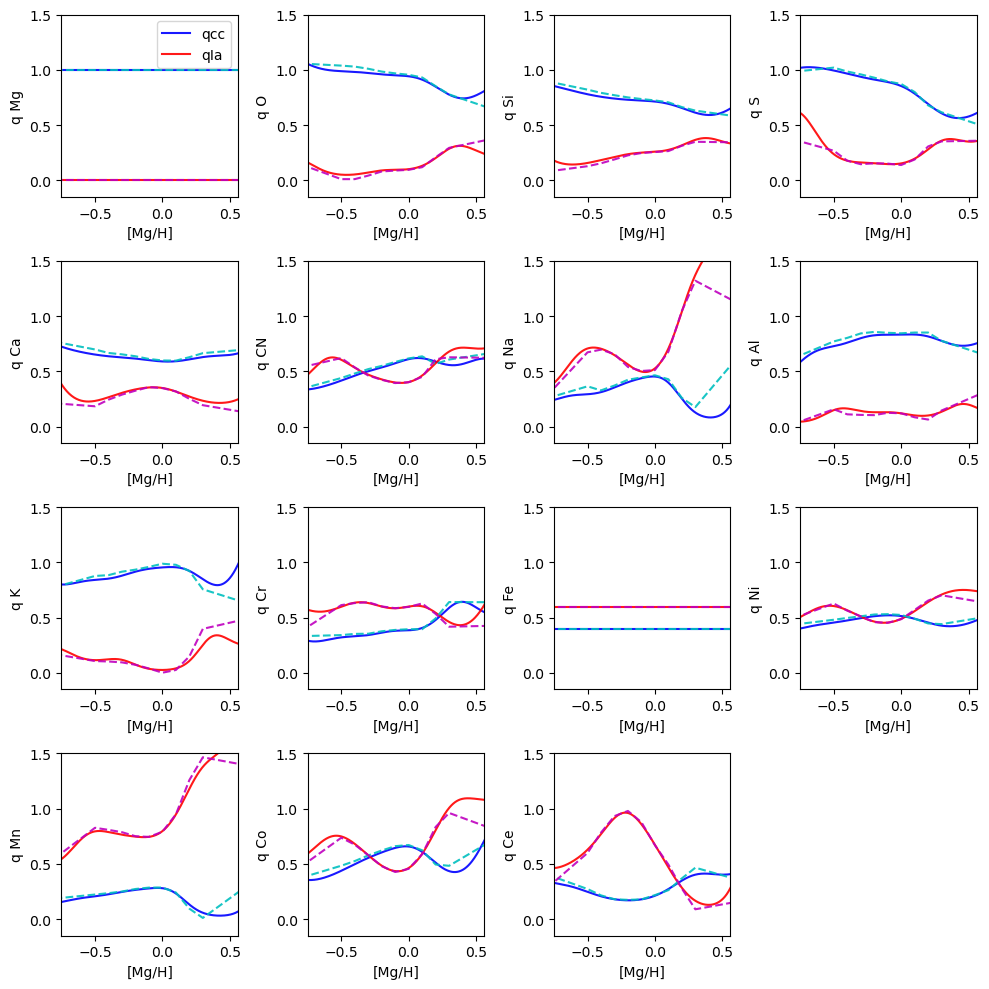

In [70]:
kpm.plot_qs(data, fixed, fit)

for i in range(data.M):
    plt.subplot(4,4,i+1)
    MgH = hdu1[1].data.Mg_H
    qcc = hdu1[1].data['qcc_'+data.elements[i]]
    qIa = hdu2[1].data['qIa_'+data.elements[i]]

    plt.plot(MgH, qcc, 'c--', alpha=0.9, label='qcc_old')
    plt.plot(MgH, qIa, 'm--', alpha=0.9, label='qIa_old')

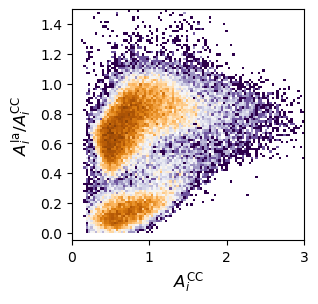

In [71]:
kpm.plot_As(fit)

/Users/emilygriffith/KProcessModel/API/kpm/visualize.py:80: RuntimeWarning: divide by zero encountered in divide
  synthnoise = _RNG2.normal(size=synthdata.shape) / data.sqrt_allivars


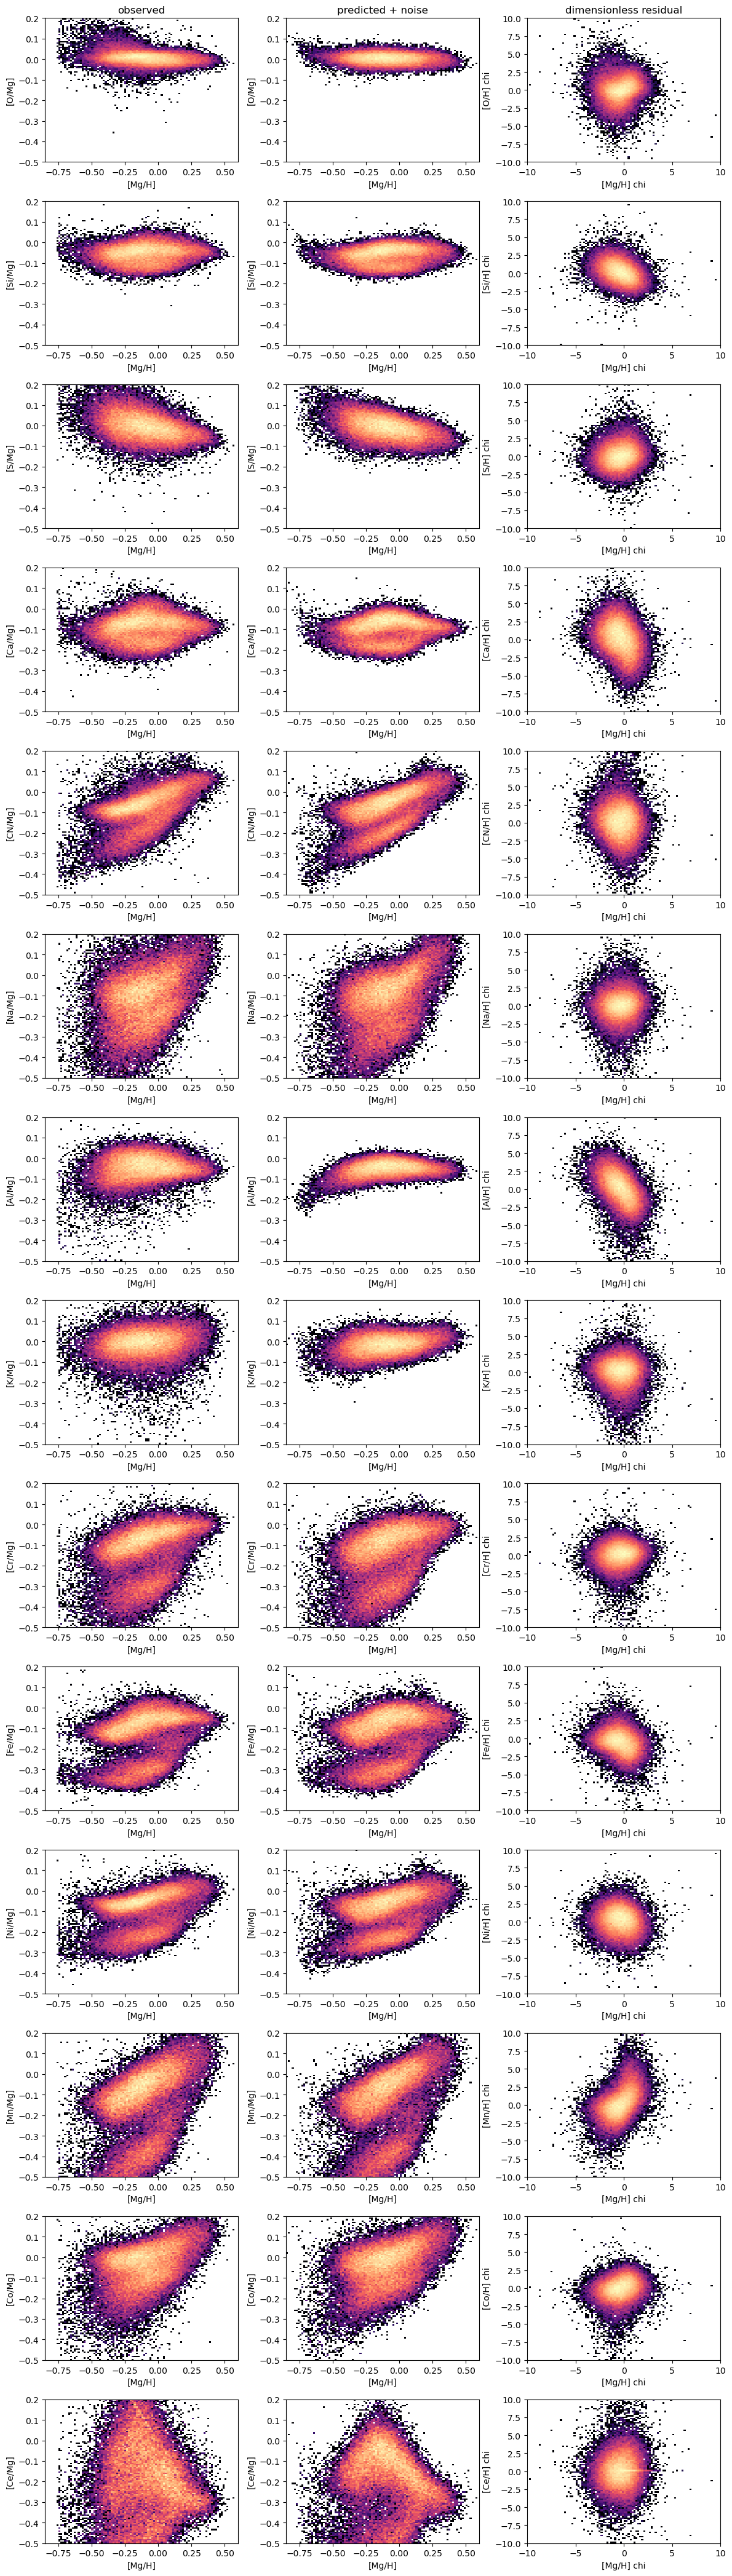

In [72]:
kpm.plot_model_abundances(data, fixed, fit, noise=True)